In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:/Users/jagadeesh baman/Documents/New folder/Simmons11.xlsx')

In [3]:
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [4]:
data.describe() # it is used to get some statistical details

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [5]:
data['Coupon'].unique() #it gives unique value in particular column

array([0, 1], dtype=int64)

In [6]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

# build the model

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

spliting the dataset

In [8]:
x = data[['Card','Spending']]
y = data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

fit the model

In [14]:
LogisticRegression?

In [15]:
lreg = LogisticRegression(solver='lbfgs')
lreg.fit(x_train, y_train.ravel()) #ravel() will return 1D array with all the input-array elements

LogisticRegression()

In [16]:
y_predict = lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [17]:
y_predict_train = lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [18]:
y_prob_train = lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)
y_prob_train

array([0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
       0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
       0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
       0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
       0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
       0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
       0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
       0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
       0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
       0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
       0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
       0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
       0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
       0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
       0.40217015, 0.43807264, 0.50977653, 0.57944626, 0.29042

In [19]:
y_prob = lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [20]:
x = data[['Spending', 'Card']]
y = data['Coupon']
import statsmodels.api as sm
x1=sm.add_constant(x)

logit_model=sm.Logit(y,x1)

result=logit_model.fit()
print(result.summary())

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                  0.1012
Time:                        17:22:01   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

checking the accuracy of the model

In [ ]:
# Accuracy = 1-error rate [ error rate = (sum of misclassified records)/(total records)]

In [21]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)
score

0.76

Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [ ]:
#for example:-
#TruePositives = Test states you have the disease when you do have the disease
#TrueNegativies = Test states you do not have the the disease when you do not have the disease
#FalsePositivies Test states you have the disease when you do not have the disease
#FalseNeagativis = Test states you do not have the disease when you do

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



#recall gives us an idea about when it's actually yes. how offten does it predict yes.
#precsion tells us about when it predicts yes, how often is it correct
#precision = tp/(tp+fp).for 1
#accuracy = (tp+tn)/(tp+tn+fp+fn)
#Recall = tp/(tp+fn).for 1
#Fmeasure = 2(RecallPrecision)/(Recall+Presision)

harmonoic mean of precision & Recall is used to indicate a balance between Precision & Recall providing each equal weightage,
it ranges from 0 to 1. F1 Score reaches its best value at 1(Perfect precision & recall)and worst at 0.

In [25]:
Accuracy = (tp + tn) / (tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


true negative rate

In [26]:
Specificity = tn/(tn+fp) # OR Specificity :- n0,0 = n0,0/(n0,0+n0,1)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.94


True Positiverate

In [27]:
Sensitivity = tp/(tp+fn)  # OR Sencitivity :- n1,1=n1,1/(n1,1+n1,0) 
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.44


In [ ]:
LOW Thereshold:-
     -Low Specificity
     -High Sencitivity

HIGH Thereshold:-
     -High Specificity
     -Low Sencitivity

# ROC curve

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1 = roc_auc_score(y_train,y_predict_train)
fpr1, tpr1, thresholds1 =  roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

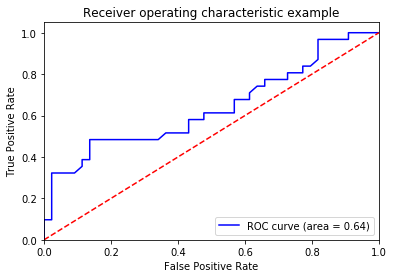

In [29]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()

In [30]:
log_ROC_AUC = roc_auc_score(y_test,y_predict)
fpr, tpr, thresholds= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [32]:
fpr

array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.125 ,
       0.375 , 0.375 , 0.625 , 0.75  , 1.    ])

In [33]:
tpr

array([0.        , 0.11111111, 0.33333333, 0.33333333, 0.55555556,
       0.55555556, 0.66666667, 0.88888889, 0.88888889, 1.        ,
       1.        , 1.        , 1.        ])

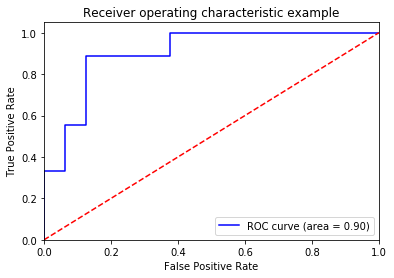

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc ="lower right")
plt.show()

set the threshold at 0.35

In [34]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),0.35)[0]
y_predict_class1

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.35 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [35]:
#converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [36]:
confusion_matrix_2=confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [37]:
tn,fp,fn,tp=confusion_matrix(y_test, y_predict_class1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  8
False Positives:  8
False Negatives:  0
True Positives:  9


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



set the threshold at 0.50

In [40]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),0.5)[0]
y_predict_class1

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [41]:
#converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [42]:
confusion_matrix_2=confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[15  1]
 [ 5  4]]


In [43]:
tn,fp,fn,tp=confusion_matrix(y_test, y_predict_class1).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



Find optimal Cutoff point(Threshold value)

In [45]:
from sklearn.metrics import roc_curve,auc

In [46]:
fpr, tpr, thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

In [47]:
print("Area Under the ROC curve : %f" % roc_auc)

Area Under the ROC curve : 0.902778


In [50]:
import numpy as np
i=np.arange(len(tpr))# index for df
roc=pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index=i),
                 '1-fpr' : pd.Series(1-fpr, index=i), 'tf' :pd.Series(tpr - (1-fpr), index = i),
                 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


[]

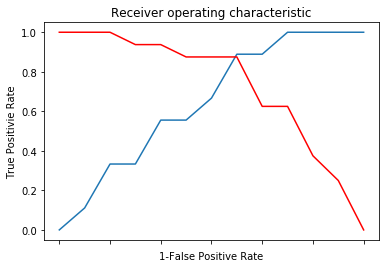

In [51]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positivie Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [63]:
from sklearn.preprocessing import binarize
y_predict_class4=binarize(y_prob.reshape(1,-1),0.45)[0]
y_predict_class4

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass threshold=0.45 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [64]:
confusion_matrix_5=confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

